# check for ribo protein

In [1]:
library(Seurat)

library(dplyr)
library(glue)
library(ggplot2)
library(patchwork)
library(cowplot)
library(stringr)
library(tidyr)
library("dplyr")

sample_id = c("mWT","mNFIXko")
myList = list()
for(i in 1:length(sample_id)){
    s=sample_id[i]
    dir = glue("{s}/outs/filtered_feature_bc_matrix")
    myData <- Read10X(data.dir = dir)
    myList[[i]]  <- CreateSeuratObject(counts = myData[["Gene Expression"]], min.cells = 0, min.features = 0,project = s, assay = "RNA")
    myList[[i]][["ADT"]] <- CreateAssayObject(myData[["Antibody Capture"]][, colnames(x = myList[[i]] )])

}

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse



Attaching package: 'cowplot'


The following object is masked from 'package:patchwork':

    align_plots


10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


In [2]:
merged_obj = merge(myList[[1]], y = myList[[2]],add.cell.ids = sample_id)

In [3]:
merged_obj[["percent.mt"]] <- PercentageFeatureSet(merged_obj, pattern = "^mt-")
merged_obj[["percent.rp"]] <- PercentageFeatureSet(merged_obj, pattern = "^Rp[l|s]")


In [36]:
139532/39184887

[1] 0.003560863

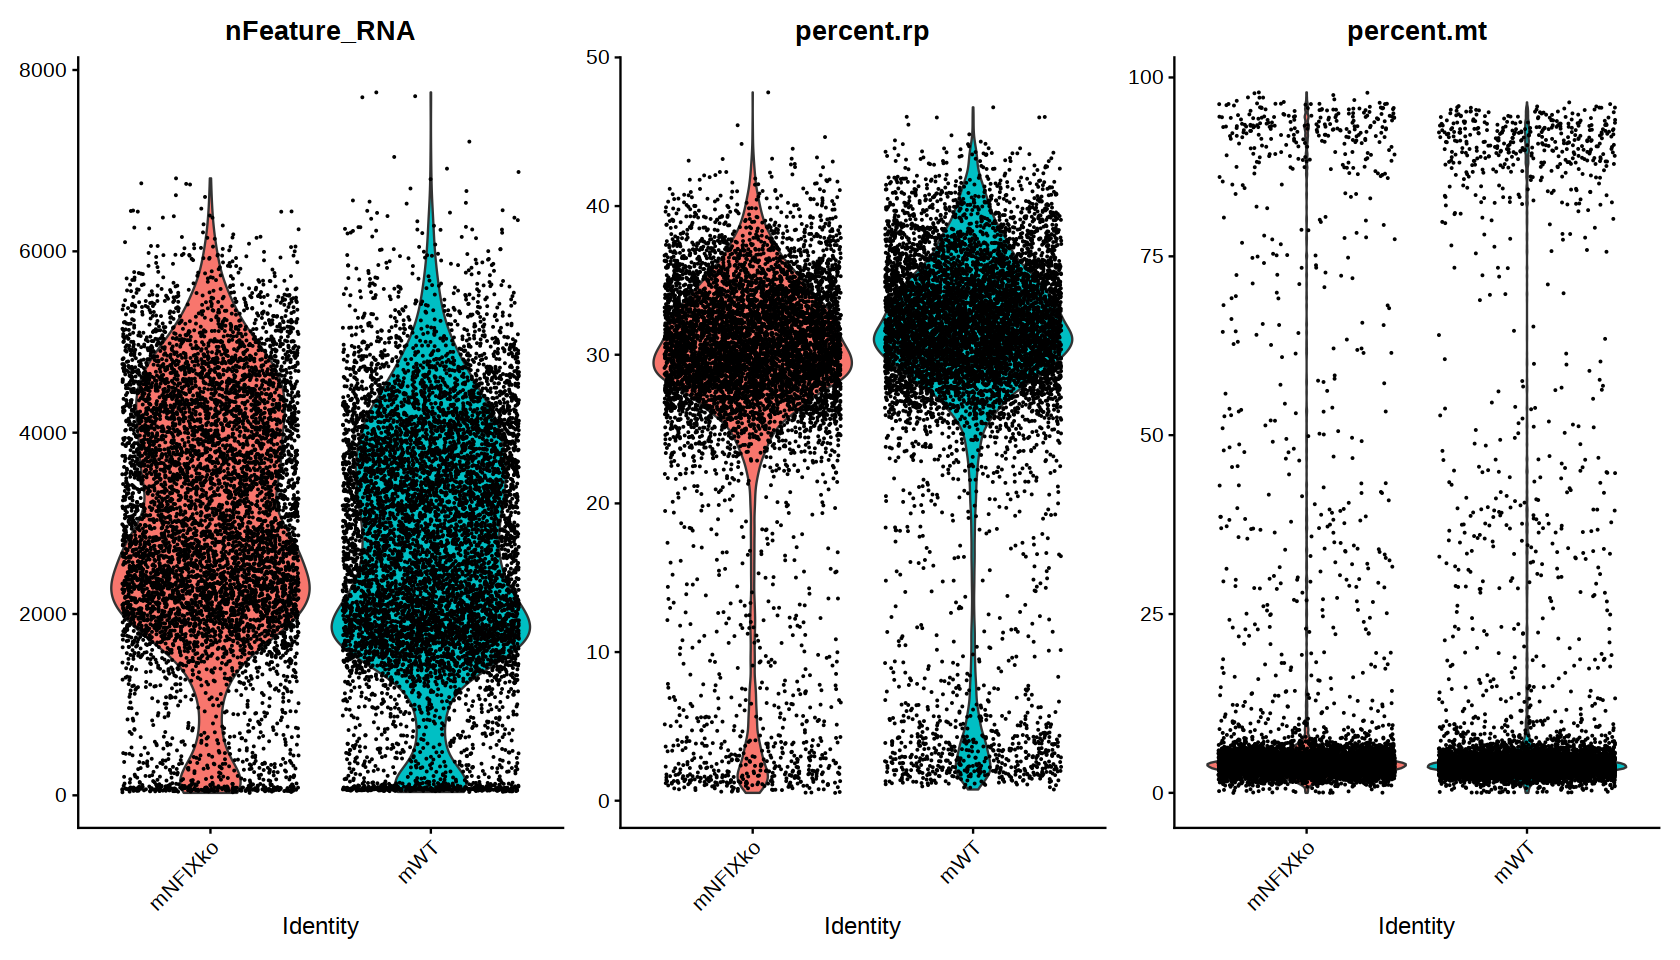

In [5]:
options(repr.plot.width = 14, repr.plot.height = 8)

VlnPlot(merged_obj, features = c("nFeature_RNA", "percent.rp", "percent.mt"), ncol = 3)


# regress rp out

In [6]:
merged_obj <- subset(merged_obj, subset = nFeature_RNA >= 200 & nFeature_RNA <= 6000 & percent.mt <= 10 & nFeature_RNA <=50000)


In [7]:
DefaultAssay(merged_obj) <- 'RNA'

merged_obj <- NormalizeData(merged_obj)
merged_obj <- FindVariableFeatures(merged_obj, selection.method = "vst")
merged_obj <- ScaleData(merged_obj, vars.to.regress = "percent.rp", features = rownames(merged_obj))
merged_obj <- RunPCA(merged_obj, features = VariableFeatures(merged_obj), nfeatures.print = 10)


Regressing out percent.rp



In [ ]:
DefaultAssay(merged_obj) <- 'ADT'
VariableFeatures(merged_obj) <- rownames(merged_obj[["ADT"]])
merged_obj <- NormalizeData(merged_obj, normalization.method = 'CLR', margin = 2) %>% 
  ScaleData() %>% RunPCA(reduction.name = 'apca')
DimPlot(merged_obj)

# check rp distribution on previous classification

In [8]:
load("manual_label.RData")

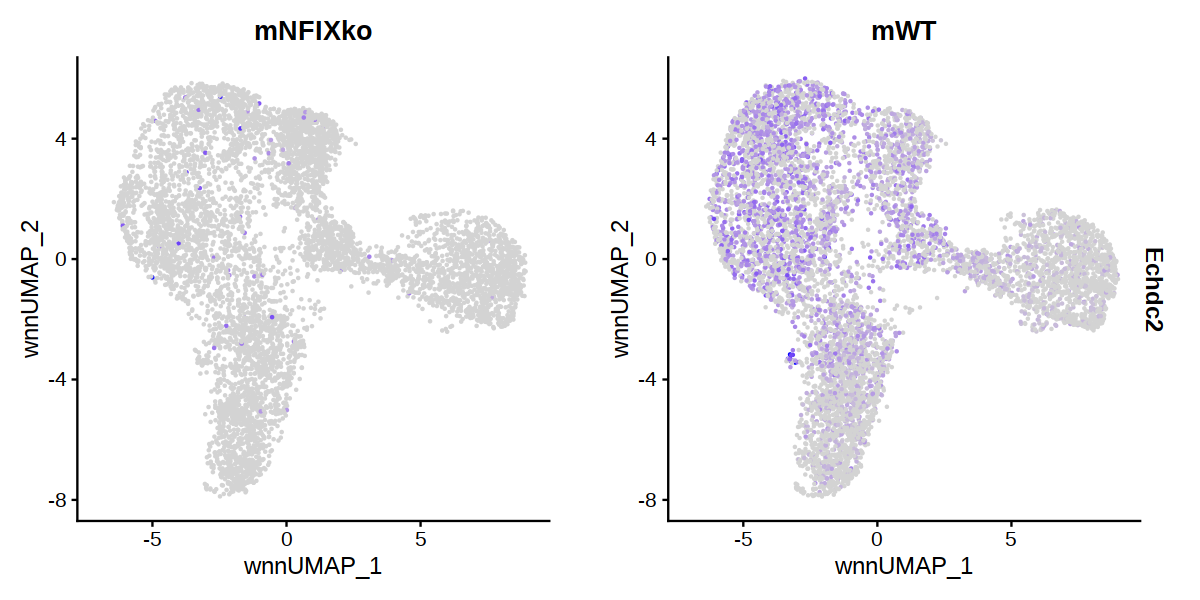

In [15]:
options(repr.plot.width = 10, repr.plot.height = 5)

FeaturePlot(merged_obj, features = "Echdc2", reduction = 'wnn.umap',split.by="orig.ident",slot="data")

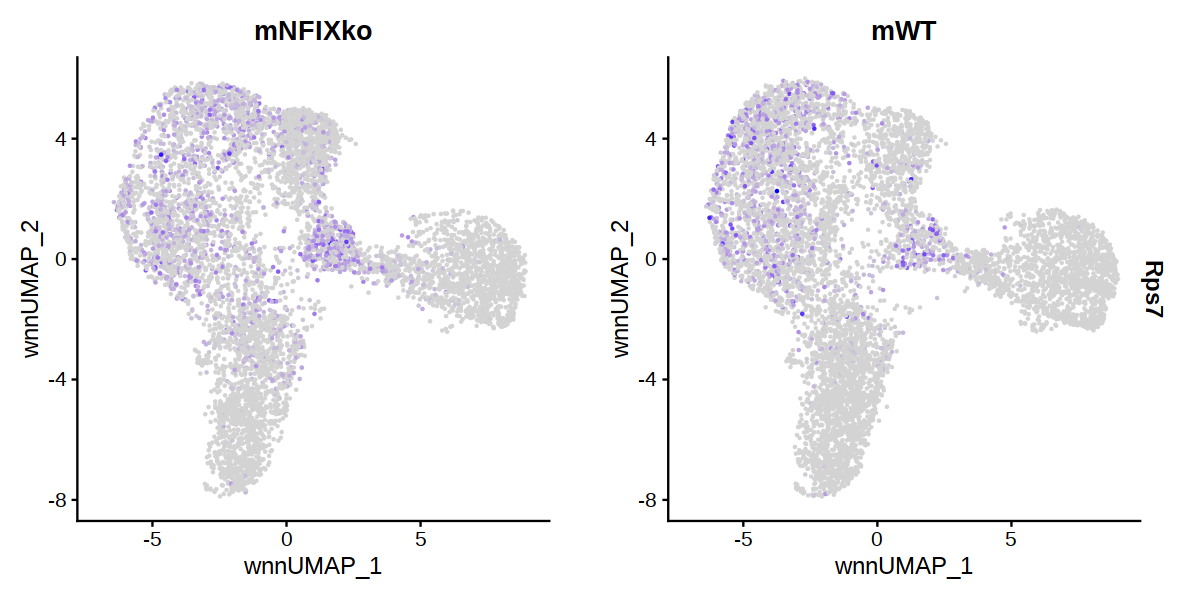

In [31]:
options(repr.plot.width = 10, repr.plot.height = 5)

FeaturePlot(merged_obj, features = "Rps7", reduction = 'wnn.umap',split.by="orig.ident",slot="data",min.cutoff=4)

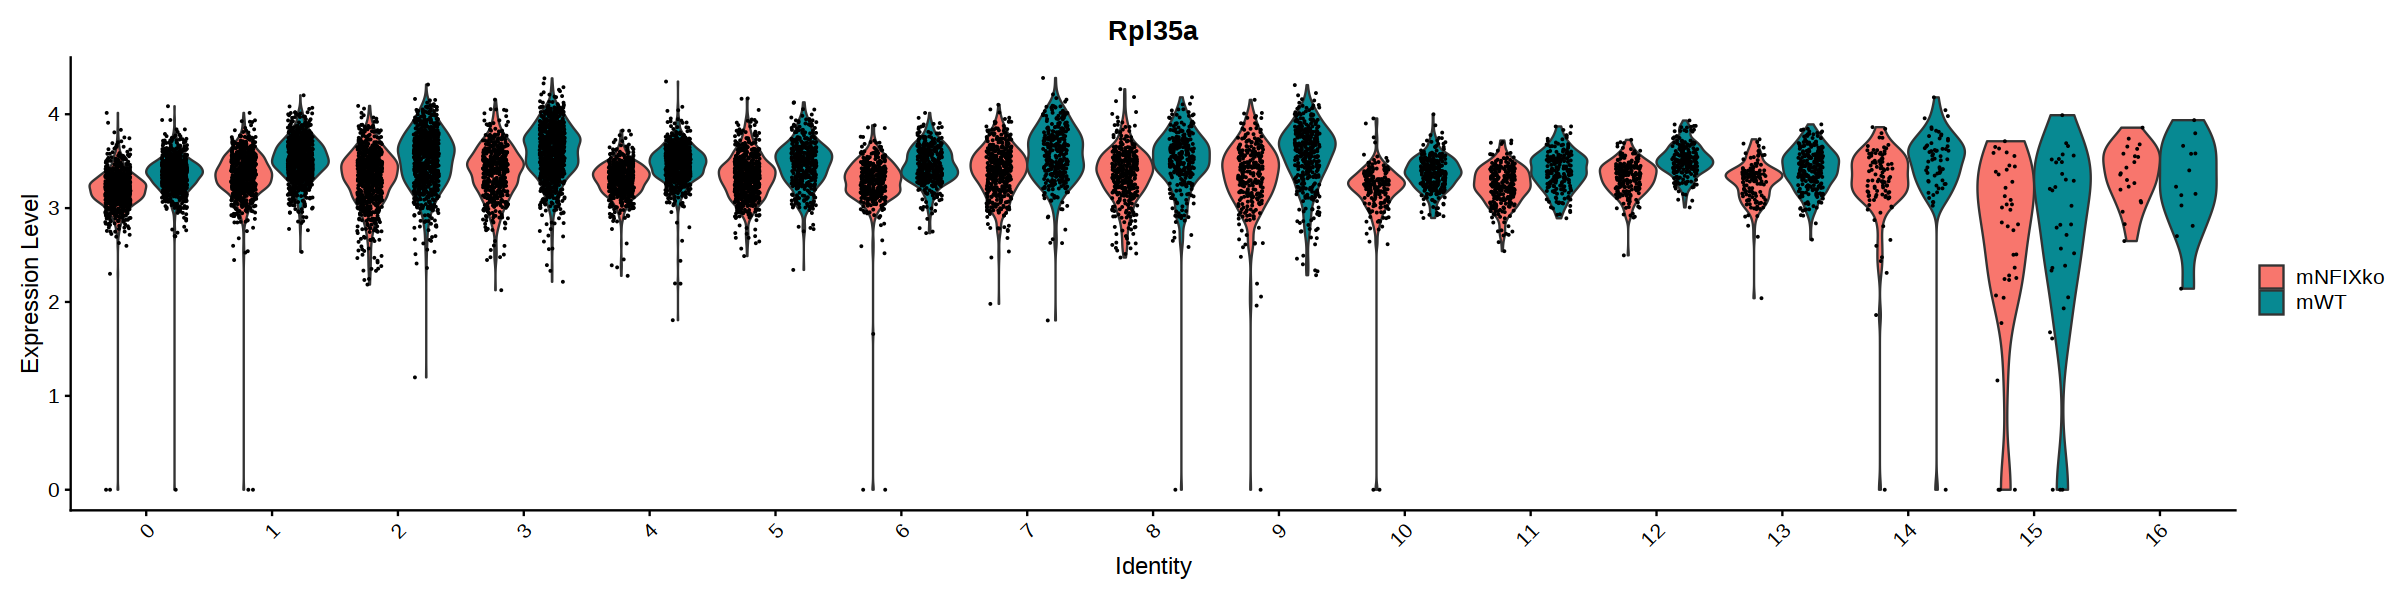

In [35]:
options(repr.plot.width = 20, repr.plot.height = 5)

VlnPlot(merged_obj, features = "Rpl35a",split.by="orig.ident",slot="data")

In [45]:
merged_obj

An object of class Seurat 
31061 features across 13949 samples within 2 assays 
Active assay: RNA (31053 features, 2000 variable features)
 1 other assay present: ADT
 5 dimensional reductions calculated: pca, apca, wnn.umap, rna.umap, adt.umap

In [46]:
merged_obj@assays$RNA@scale.data["Rps7",c("mWT_AAACCCAAGTGATCGG-1")]

ERROR: Error in merged_obj@assays$RNA@scale.data["Rps7", c("mWT_AAACCCAAGTGATCGG-1")]: subscript out of bounds


In [51]:
merged_obj@assays$RNA@data["Rps7",c("mWT_AAACCCAAGTGATCGG-1")]

[1] 3.826256

In [52]:
merged_obj = NormalizeData(merged_obj)

In [53]:
merged_obj@assays$RNA@data["Rps7",c("mWT_AAACCCAAGTGATCGG-1")]

[1] 3.826256

In [40]:
merged_obj@assays$RNA@counts["Rps7", ]

mWT_AAACCCAAGTGATCGG-1     mWT_AAACCCACAAACCATC-1 
                        17                         75 
    mWT_AAACCCACACTGTCCT-1     mWT_AAACCCACAGCCATTA-1 
                        53                         58 
    mWT_AAACCCAGTACCTAAC-1     mWT_AAACCCAGTCCTCCTA-1 
                        77                         91 
    mWT_AAACCCAGTGAATTAG-1     mWT_AAACCCAGTTCTCTCG-1 
                        90                         74 
    mWT_AAACCCATCAAATGAG-1     mWT_AAACCCATCTGTCCCA-1 
                        61                         18 
    mWT_AAACGAAAGATTTGCC-1     mWT_AAACGAAAGCCTCGTG-1 
                        41                         87 
    mWT_AAACGAAAGGAACGTC-1     mWT_AAACGAACAACCAGAG-1 
                        50                         73 
    mWT_AAACGAACAAGCAGGT-1     mWT_AAACGAACACATCATG-1 
                        45                         49 
    mWT_AAACGAATCCGTAATG-1     mWT_AAACGAATCCTTCAGC-1 
                        69                         51 
    mWT_AAACGAATCGAAGGAC-1     mWT_AAACGAATCGGCTTCT-1 
                        18                         11 
    mWT_AAACGAATCGTAGCTA-1     mWT_AAACGAATCTTGGCTC-1 
                        53                         11 
    mWT_AAACGAATCTTGGTGA-1     mWT_AAACGCTAGCGCCCAT-1 
                        71                         51 
    mWT_AAACGCTAGCTGACAG-1     mWT_AAACGCTAGTGCGACA-1 
                        48                         56 
    mWT_AAACGCTCAAGTGACG-1     mWT_AAACGCTCATACAGGG-1 
                        29                         44 
    mWT_AAACGCTGTCTTGCGG-1     mWT_AAACGCTGTGTCATCA-1 
                        83                         64 
    mWT_AAAGAACAGCGTGTTT-1     mWT_AAAGAACAGGAAAGGT-1 
                        35                         19 
    mWT_AAAGAACCAACTCGTA-1     mWT_AAAGAACGTCTTCATT-1 
                       105                         65 
    mWT_AAAGAACTCAAATGAG-1     mWT_AAAGAACTCCGAACGC-1 
                        67                         25 
    mWT_AAAGAACTCCTGCTAC-1     mWT_AAAGGATAGCATTGAA-1 
                        48                         37 
    mWT_AAAGGATAGGAAGTCC-1     mWT_AAAGGATAGGGTCACA-1 
                        21                         71 
    mWT_AAAGGATAGTAAACTG-1     mWT_AAAGGATCAGCTCATA-1 
                        39                         64 
    mWT_AAAGGATCAGTAGTTC-1     mWT_AAAGGATCATAGAAAC-1 
                        58                         52 
    mWT_AAAGGATGTAGGCTGA-1     mWT_AAAGGATGTAGGGTAC-1 
                        79                         71 
    mWT_AAAGGATTCACCACAA-1     mWT_AAAGGATTCCACATAG-1 
                        26                         60 
    mWT_AAAGGATTCTGGTTGA-1     mWT_AAAGGGCCATCTTTCA-1 
                        66                         57 
    mWT_AAAGGGCGTGGAAGTC-1     mWT_AAAGGTAAGAATGTTG-1 
                       116                          0 
    mWT_AAAGGTAAGGTAAAGG-1     mWT_AAAGGTACAAATTGGA-1 
                        22                         76 
    mWT_AAAGGTACAAGAATGT-1     mWT_AAAGGTACAAGAGCTG-1 
                         1                         30 
    mWT_AAAGGTACAAGCCCAC-1     mWT_AAAGGTATCACGAACT-1 
                        23                         74 
    mWT_AAAGTCCGTGCTAGCC-1     mWT_AAAGTCCTCCTAGAGT-1 
                        84                          7 
    mWT_AAAGTGAAGGCCTGCT-1     mWT_AAAGTGAAGTTGGCGA-1 
                        34                         27 
    mWT_AAAGTGACAACACAAA-1     mWT_AAAGTGACACGATAGG-1 
                        33                         21 
    mWT_AAAGTGACAGCATCTA-1     mWT_AAAGTGACAGCATGCC-1 
                        42                         36 
    mWT_AAAGTGAGTAATACCC-1     mWT_AAAGTGAGTATGGAGC-1 
                        43                         14 
    mWT_AAAGTGAGTCGCATTA-1     mWT_AAAGTGAGTCTTCTAT-1 
                        38                          8 
    mWT_AAAGTGAGTGTATCCA-1     mWT_AAATGGAAGACTTAAG-1 
                        49                         59 
    mWT_AAATGGAGTAACAGGC-1     mWT_AAATGGAGT

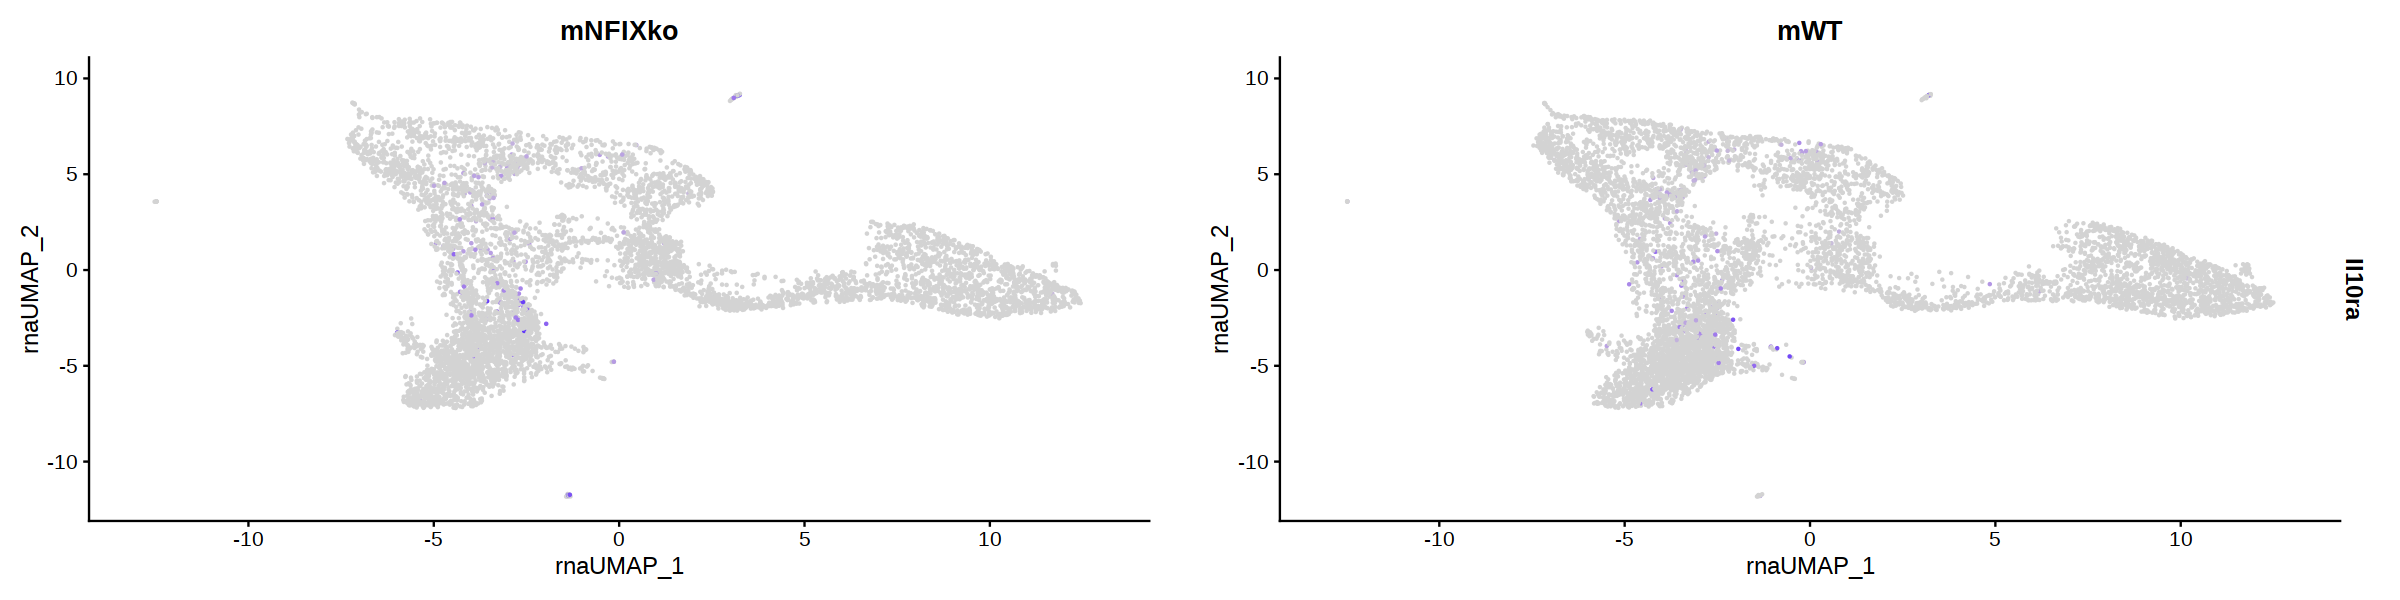

In [47]:
# DefaultAssay(merged_obj)="RNA"
FeaturePlot(merged_obj,features=c("Il10ra"),split.by="orig.ident")

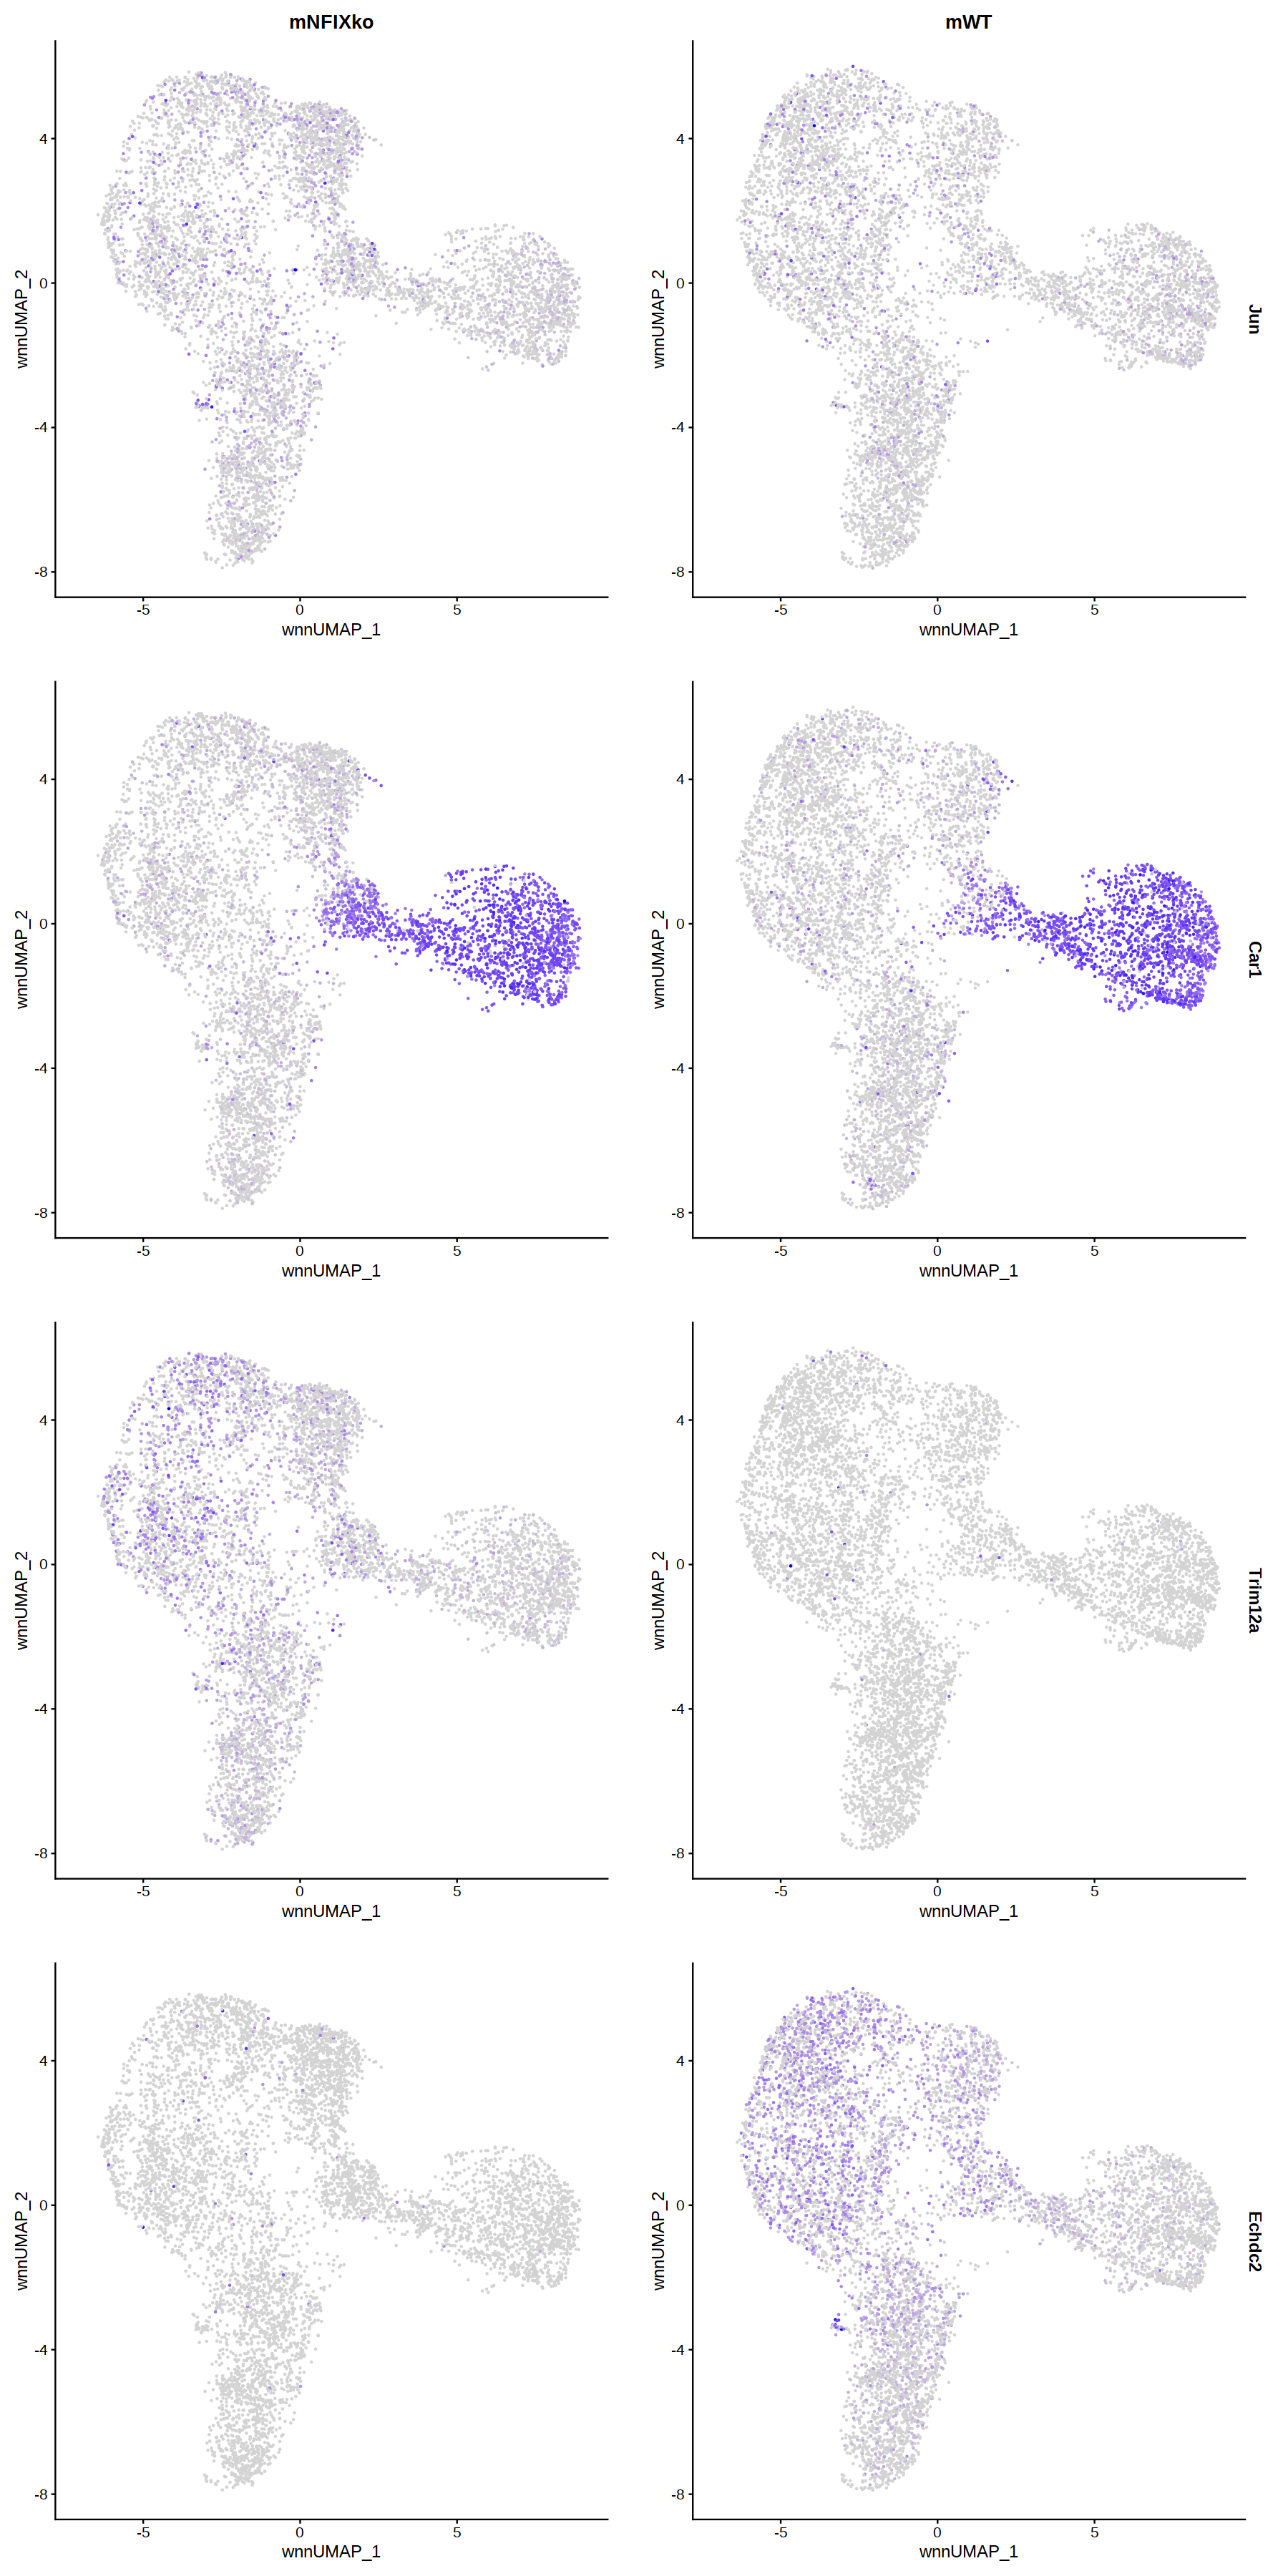

In [10]:
options(repr.plot.width = 15, repr.plot.height = 30)

FeaturePlot(merged_obj, features = c("Jun","Car1","Trim12a","Echdc2"), reduction = 'wnn.umap',ncol =4,split.by="orig.ident")

In [9]:
merged_obj[["percent.rp"]] <- PercentageFeatureSet(merged_obj, pattern = "^Rp[l|s]")

merged_obj@meta.data

orig.ident nCount_RNA nFeature_RNA nCount_ADT
mWT_AAACCCAAGTGATCGG-1     mWT         3787      1690         103       
mWT_AAACCCACAAACCATC-1     mWT        13420      3991         284       
mWT_AAACCCACACTGTCCT-1     mWT        20299      4446         208       
mWT_AAACCCACAGCCATTA-1     mWT        11463      3649         180       
mWT_AAACCCAGTACCTAAC-1     mWT        22463      5146         414       
mWT_AAACCCAGTCCTCCTA-1     mWT        28107      5085         196       
mWT_AAACCCAGTGAATTAG-1     mWT        19208      4646         341       
mWT_AAACCCAGTTCTCTCG-1     mWT        19647      4037         221       
mWT_AAACCCATCAAATGAG-1     mWT        18893      4245         389       
mWT_AAACCCATCTGTCCCA-1     mWT         4328      1881          58       
mWT_AAACGAAAGATTTGCC-1     mWT         7124      2374          42       
mWT_AAACGAAAGCCTCGTG-1     mWT        22751      4418         230       
mWT_AAACGAAAGGAACGTC-1     mWT        10575      3052          59       
mWT_AAACGAACAACCAGAG-1     mWT        17856      4043         191       
mWT_AAACGAACAAGCAGGT-1     mWT        11934      3719         247       
mWT_AAACGAACACATCATG-1     mWT        20066      4234         297       
mWT_AAACGAATCCGTAATG-1     mWT        22187      4761         450       
mWT_AAACGAATCCTTCAGC-1     mWT        16976      4131         305       
mWT_AAACGAATCGAAGGAC-1     mWT         3817      1681         129       
mWT_AAACGAATCGGCTTCT-1     mWT         2896      1274         107       
mWT_AAACGAATCGTAGCTA-1     mWT        10332      3092          87       
mWT_AAACGAATCTTGGCTC-1     mWT         5459      2513         327       
mWT_AAACGAATCTTGGTGA-1     mWT        22797      4573         274       
mWT_AAACGCTAGCGCCCAT-1     mWT        12258      3779          91       
mWT_AAACGCTAGCTGACAG-1     mWT        18410      4636         530       
mWT_AAACGCTAGTGCGACA-1     mWT        16030      4180         405       
mWT_AAACGCTCAAGTGACG-1     mWT         4721      1961         114       
mWT_AAACGCTCATACAGGG-1     mWT        14127      3632         123       
mWT_AAACGCTGTCTTGCGG-1     mWT        23734      4434         209       
mWT_AAACGCTGTGTCATCA-1     mWT        15737      4025         261       
⋮                          ⋮          ⋮          ⋮            ⋮         
mNFIXko_TTTGACTGTTCAGGTT-1 mNFIXko    16322      4449         113       
mNFIXko_TTTGACTGTTTGAAAG-1 mNFIXko    12399      3252         256       
mNFIXko_TTTGACTTCAAGCCGC-1 mNFIXko     7240      2691         304       
mNFIXko_TTTGACTTCACTTTGT-1 mNFIXko     7846      2746         343       
mNFIXko_TTTGACTTCCACCTCA-1 mNFIXko    17872      4356         286       
mNFIXko_TTTGATCAGCAGCCCT-1 mNFIXko    25676      5034         231       
mNFIXko_TTTGATCCACAACGAG-1 mNFIXko     6101      2346          81       
mNFIXko_TTTGATCCAGCAGTTT-1 mNFIXko     4863      1973         159       
mNFIXko_TTTGATCGTAATTGGA-1 mNFIXko    38478      5664         514       
mNFIXko_TTTGATCGTCGGAACA-1 mNFIXko     4307      1763         113       
mNFIXko_TTTGATCGTTGCTGAT-1 mNFIXko    11835      3479         252       
mNFIXko_TTTGGAGAGTCATGGG-1 mNFIXko    13906      3701         167       
mNFIXko_TTTGGAGAGTTCTCTT-1 mNFIXko     3710      1614         164       
mNFIXko_TTTGGAGCAAACTGCT-1 mNFIXko     4523      1800         159       
mNFIXko_TTTGGAGCAAATACAG-1 mNFIXko    10532      3562          83       
mNFIXko_TTTGGAGCAGGCGAAT-1 mNFIXko     7840      2670         115       
mNFIXko_TTTGGAGCATGACTAC-1 mNFIXko     5187      1805         342       
mNFIXko_TTTGGAGGTACTGCCG-1 mNFIXko    11419      3494         388       
mNFIXko_TTTGGAGTCAAGCCAT-1 mNFIXko     9910      3054         242       
mNFIXko_TTTGGTTAGAGCCCAA-1 mNFIXko     6843      2391         421       
mNFIXko_TTTGGTTGTCTTGCTC-1 mNFIXko     6319      2424          83       
mNFIXko_TTTGGTTGTGGCAACA-1 mNFIXko    11909      3372         134       
mNFIXko_TTTGGTTTCAACACCA-1 mNFIXko     7124      2548          84       
mNFIXko_TTTG

In [10]:
?VlnPlot

VlnPlot                 package:Seurat                 R Documentation

_S_i_n_g_l_e _c_e_l_l _v_i_o_l_i_n _p_l_o_t

_D_e_s_c_r_i_p_t_i_o_n:

     Draws a violin plot of single cell data (gene expression, metrics,
     PC scores, etc.)

_U_s_a_g_e:

     VlnPlot(
       object,
       features,
       cols = NULL,
       pt.size = NULL,
       idents = NULL,
       sort = FALSE,
       assay = NULL,
       group.by = NULL,
       split.by = NULL,
       adjust = 1,
       y.max = NULL,
       same.y.lims = FALSE,
       log = FALSE,
       ncol = NULL,
       slot = "data",
       split.plot = FALSE,
       stack = FALSE,
       combine = TRUE,
       fill.by = "feature",
       flip = FALSE
     )
     
_A_r_g_u_m_e_n_t_s:

  object: Seurat object

features: Features to plot (gene expression, metrics, PC scores,
          anything that can be retreived by FetchData)

    cols: Colors to use for plotting

 pt.size: Point size for geom_violin

  idents: Which classes to include in the plot (default is all)

    sort: Sort identity classes (on the x-axis) by the average
          expression of the attribute being potted, can also pass
          'increasing' or 'decreasing' to change sort direction

   assay: Name of assay to use, defaults to the active assay

group.by: Group (color) cells in different ways (for example,
          orig.ident)

split.by: A variable to split the violin plots by,

  adjust: Adjust parameter for geom_violin

   y.max: Maximum y axis value

same.y.lims: Set all the y-axis limits to the same values

     log: plot the feature axis on log scale

    ncol: Number of columns if multiple plots are displayed

    slot: Use non-normalized counts data for plotting

split.plot: plot each group of the split violin plots by multiple or
          single violin shapes.

   stack: Horizontally stack plots for each feature

 combine: Combine plots into a single ‘patchworked’ ggplot object. If
          ‘FALSE’, return a list of ggplot

 fill.by: Color violins/ridges based on either 'feature' or 'ident'

    flip: flip plot orientation (identities on x-axis)

_V_a_l_u_e:

     A ‘patchworked’ ggplot object if ‘combine = TRUE’; otherwise, a
     list of ggplot objects

_S_e_e _A_l_s_o:

     ‘FetchData’

_E_x_a_m_p_l_e_s:

     data("pbmc_small")
     VlnPlot(object = pbmc_small, features = 'PC_1')
     VlnPlot(object = pbmc_small, features = 'LYZ', split.by = 'groups')

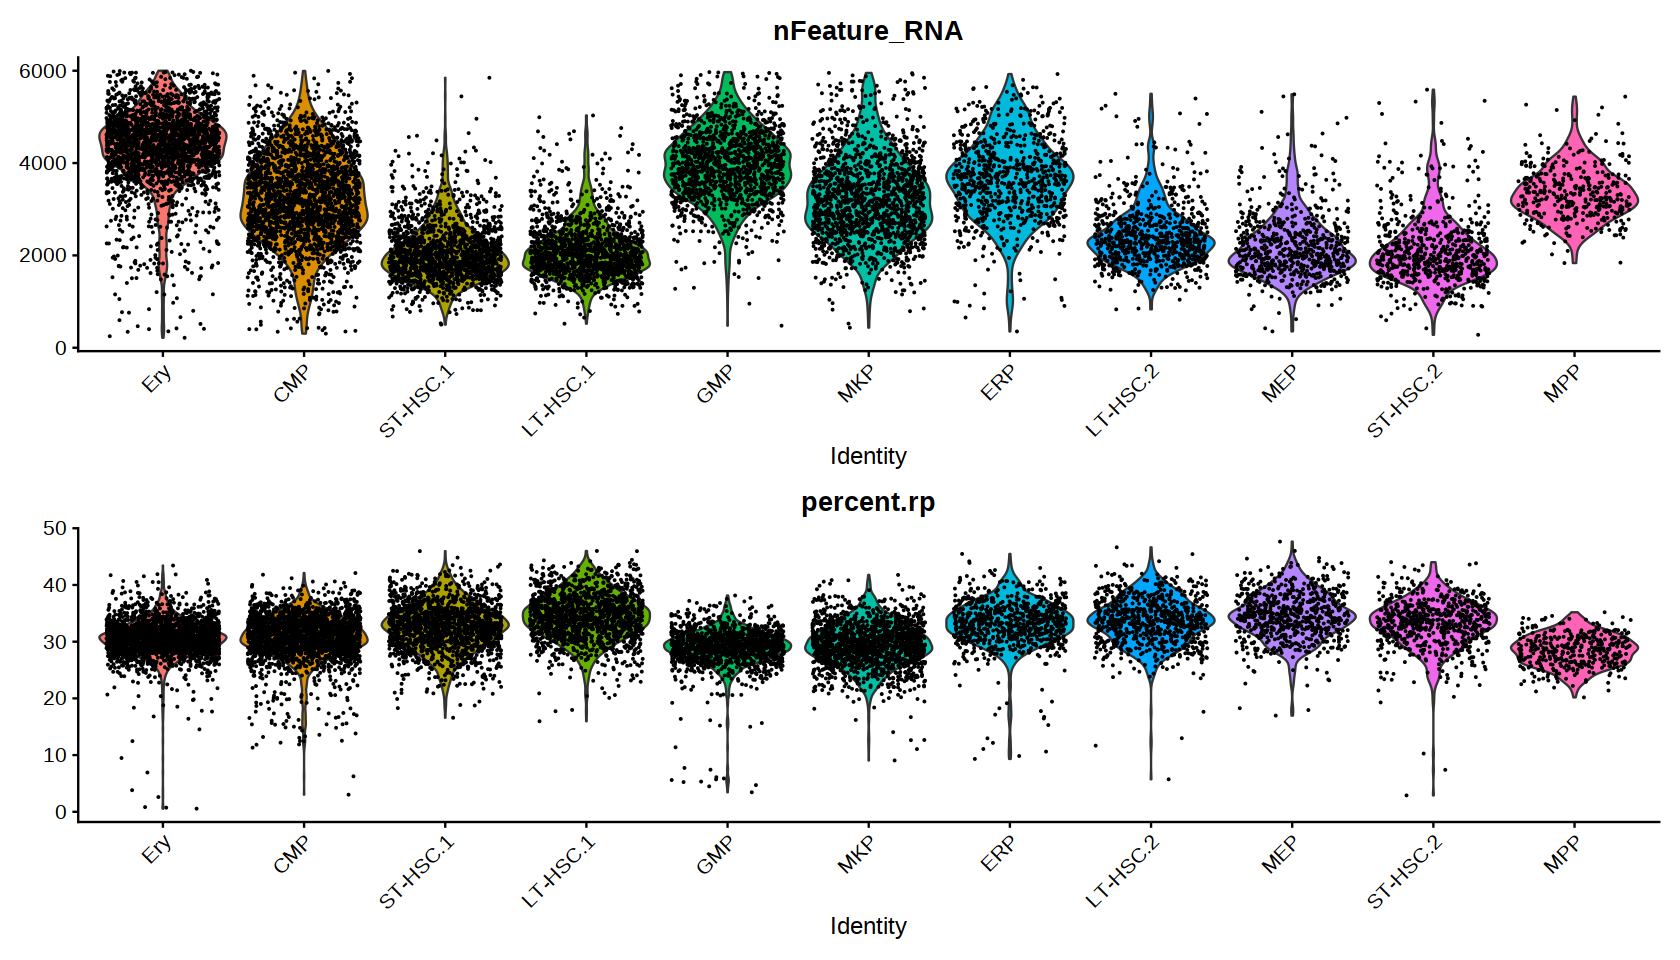

In [13]:
VlnPlot(merged_obj, features = c("nFeature_RNA", "percent.rp"), ncol = 1,group.by="manual_label")


In [49]:
merged_obj[['ADT']]

Assay data with 8 features for 13949 cells
Top 8 variable features:
 Sca1-TotalA, CD150-TotalA, CD48-TotalA, CD16-32-TotalA, CD105-TotalA,
CD41-TotalA, CD71-TotalA, CD34-TotalA 

Warning message:
"Could not find CD41-TotalA in the default search locations, found in ADT assay instead"


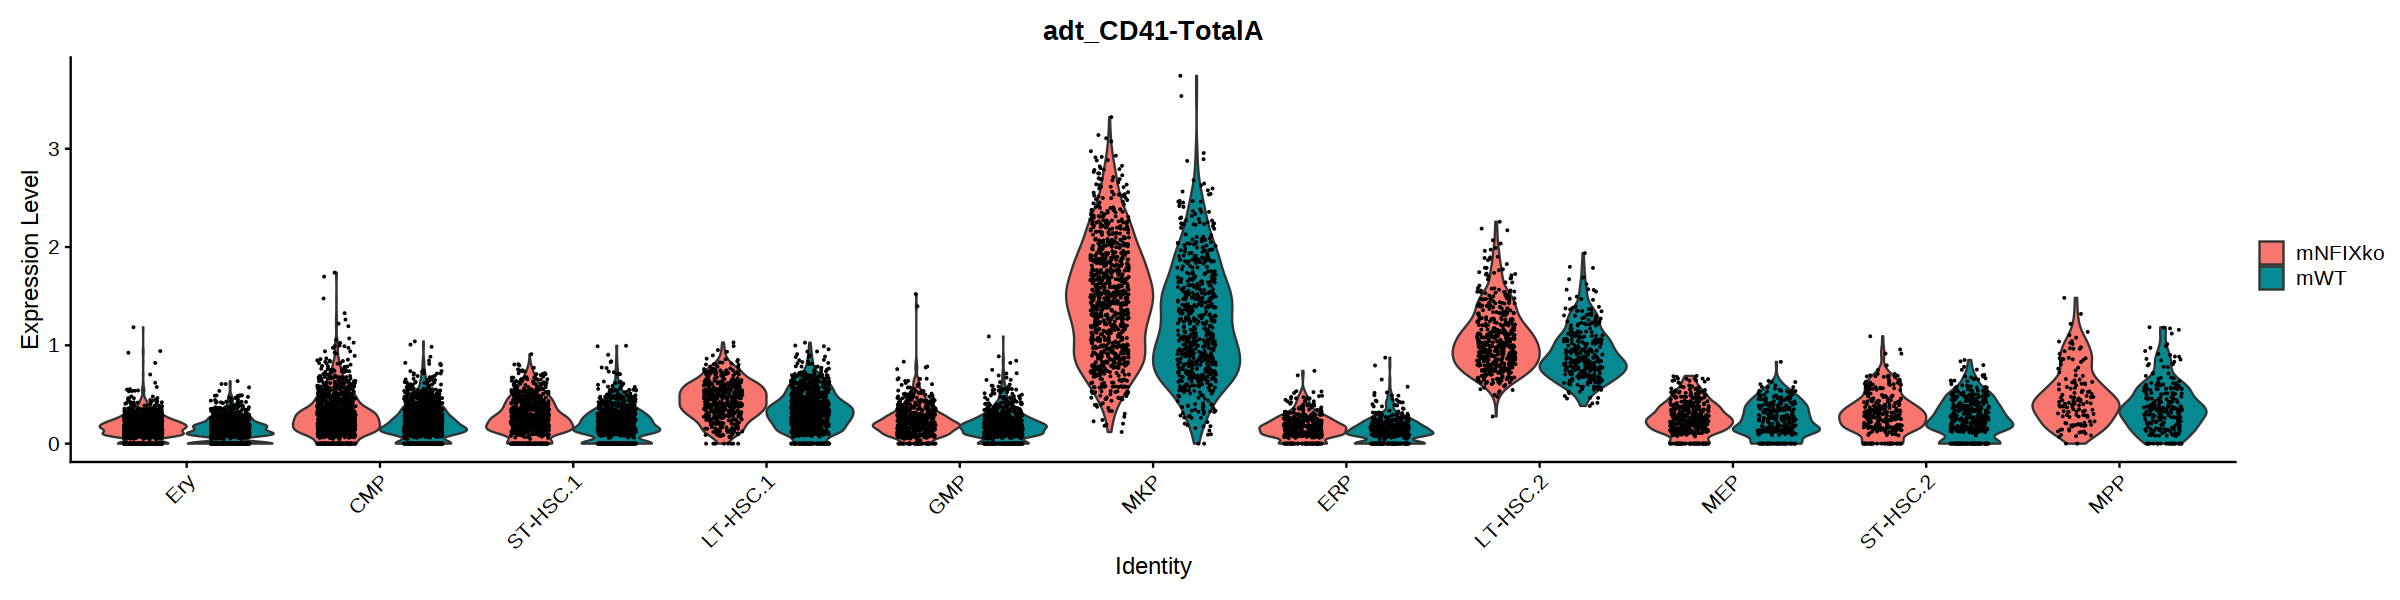

In [50]:
VlnPlot(merged_obj, features = c("CD41-TotalA"), ncol = 1,group.by="manual_label",split.by="orig.ident")
